In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/Dataset-Movement/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset')


['README.txt',
 'features_info.txt',
 'features.txt',
 'activity_labels.txt',
 '.DS_Store',
 'test',
 'train']

In [ ]:
features = pd.read_csv("/content/drive/MyDrive/Dataset-Movement/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/features.txt", sep=r"\s+", header = None)
feature_names = features[1].tolist()
print(feature_names)
print(features.shape)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/Dataset-Movement/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", sep=r"\s+", header=None)
y_train = pd.read_csv("/content/drive/MyDrive/Dataset-Movement/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", sep=r"\s+", header=None, names=["Activity"])
X_test = pd.read_csv("/content/drive/MyDrive/Dataset-Movement/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", sep=r"\s+", header=None)
y_test = pd.read_csv("/content/drive/MyDrive/Dataset-Movement/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", sep=r"\s+", header=None, names=["Activity"])

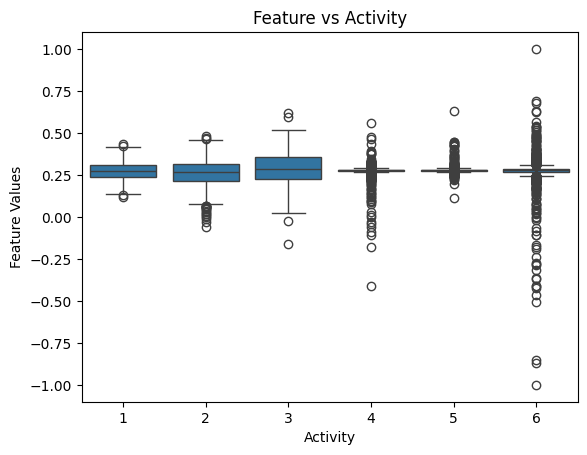

In [ ]:
sns.boxplot(x=y_train["Activity"], y=X_train.iloc[:, 0])
plt.ylabel("Feature Values")
plt.title("Feature vs Activity")
plt.show()

Original Regression (No changes)        

Accuracy: 0.9602986087546658


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train["Activity"])
preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test["Activity"], preds))

print("\nClassification Report:")
print(classification_report(
    y_test["Activity"], preds,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
))



Accuracy: 0.9602986087546658

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.94      0.99      0.97       496
  WALKING_UPSTAIRS       0.97      0.94      0.95       471
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.98      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



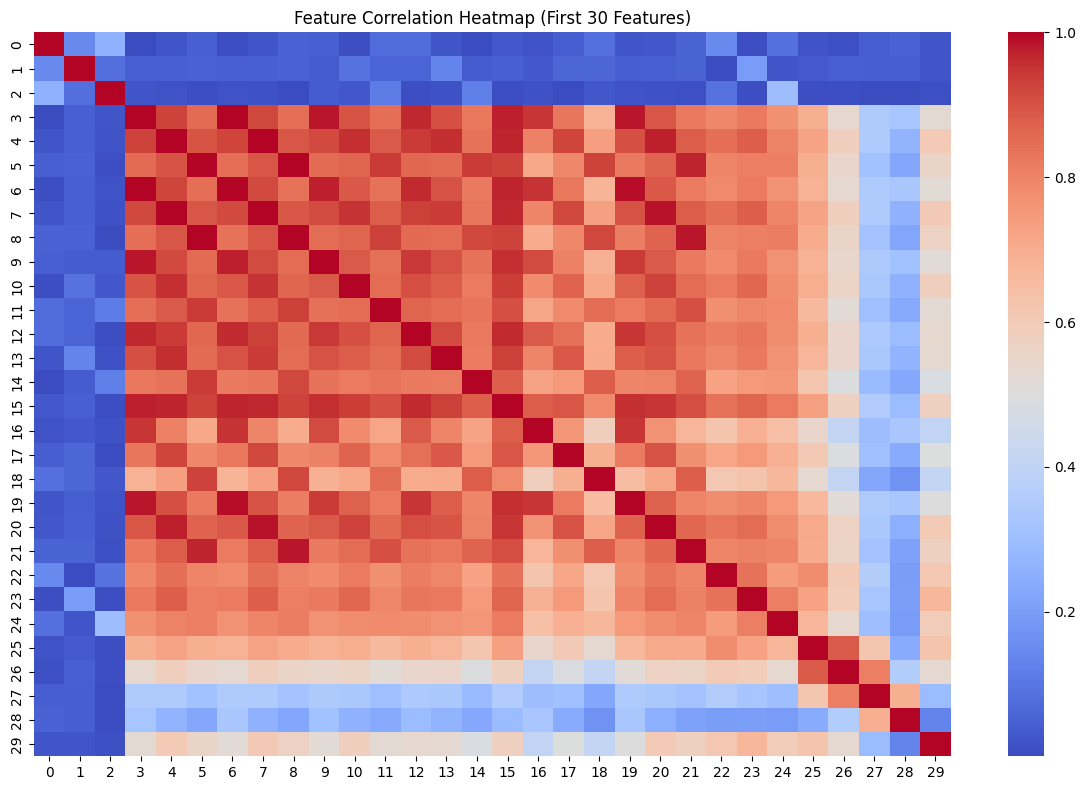

In [ ]:
X_corr_base = X_train.copy()

corr_matrix = X_corr_base.corr().abs()

top_n = 30
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.iloc[:top_n, :top_n],
            cmap="coolwarm",
            annot=False)
plt.title(f"Feature Correlation Heatmap (First {top_n} Features)")
plt.tight_layout()
plt.show()

In [ ]:
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

threshold = 0.9

to_drop = [
    column
    for column in upper.columns
    if any(upper[column] > threshold)
]

print("Highly correlated features to drop:", to_drop)
print("Number to drop:", len(to_drop))

X_train_corr = X_corr_base.drop(columns=to_drop)
X_test_corr  = X_test.drop(columns=to_drop)

print("Original training shape:", X_corr_base.shape)
print("Correlation-reduced training shape:", X_train_corr.shape)

Highly correlated features to drop: [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59, 60, 61, 66, 67, 68, 70, 71, 72, 74, 75, 76, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 113, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 146, 154, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 189, 193, 200, 201, 202, 203, 205, 206, 207, 208, 210, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 239, 240, 241, 242, 244, 245, 246, 249, 252, 253, 254, 255, 257, 258, 259, 260, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 297, 299, 301, 302, 303, 310, 311, 312, 313, 314, 315, 316, 317, 318, 324, 325, 326, 327, 328, 329, 330, 332, 338, 339, 340, 341, 342, 343,

Logistic Regression Correlation Matrix                
Accuracy: 0.9402782490668476


In [ ]:
model_corr = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial'
)

model_corr.fit(X_train_corr, y_train["Activity"])
preds_corr = model_corr.predict(X_test_corr)

print("Accuracy after correlation-based feature removal:",
      accuracy_score(y_test["Activity"], preds_corr))

print("\nClassification Report:")
print(classification_report(
    y_test["Activity"], preds_corr,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS",
                  "SITTING","STANDING","LAYING"]
))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy after correlation-based feature removal: 0.9402782490668476

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.93      0.99      0.96       496
  WALKING_UPSTAIRS       0.95      0.92      0.94       471
WALKING_DOWNSTAIRS       0.97      0.94      0.95       420
           SITTING       0.93      0.86      0.90       491
          STANDING       0.87      0.94      0.91       532
            LAYING       1.00      0.99      0.99       537

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



In [ ]:

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.01)
    Q3 = df.quantile(0.99)
    IQR = Q3 - Q1
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

X_train_no_outliers = remove_outliers_iqr(X_train)
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

print("Original shape:", X_train.shape)
print("After removing outliers:", X_train_no_outliers.shape)


Original shape: (7352, 561)
After removing outliers: (7186, 561)


Logistic Regression Removing Outliers             
Accuracy : 0.9606379368849678


In [ ]:
model_no_outliers = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers["Activity"])
preds_no_outliers = model_no_outliers.predict(X_test)

print("Accuracy after removing outliers:", accuracy_score(y_test["Activity"], preds_no_outliers))
print("\nClassification Report:")
print(classification_report(
    y_test["Activity"], preds_no_outliers,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy after removing outliers: 0.9606379368849678

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.94      0.99      0.97       496
  WALKING_UPSTAIRS       0.97      0.94      0.95       471
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
           SITTING       0.98      0.88      0.92       491
          STANDING       0.90      0.98      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
importance = pd.Series(np.abs(model.coef_).mean(axis=0))
importance = importance.sort_values(ascending=False)
importance.head(10)

,0
182,1.349656
41,0.921276
50,0.881536
53,0.872926
445,0.777081
56,0.746130
37,0.721202
186,0.702673
104,0.648243
118,0.644528


In [ ]:
high_thresh = importance.quantile(0.75)
mid_thresh = importance.quantile(0.40)

In [ ]:
def categorize_importance(val):
    if val >= high_thresh:
        return "Probably important"
    elif val >= mid_thresh:
        return "Maybe helpful"
    else:
        return "Probably not helpful"

categories = importance.apply(categorize_importance)
feature_summary = pd.DataFrame({"Feature": importance.index, "Importance": importance.values, "Category": categories})
feature_summary.head(120)


,Feature,Importance,Category
182,182,1.349656,Probably important
41,41,0.921276,Probably important
50,50,0.881536,Probably important
53,53,0.872926,Probably important
445,445,0.777081,Probably important
...,...,...,...
503,503,0.222496,Probably important
507,507,0.220120,Probably important
502,502,0.220120,Probably important
71,71,0.219106,Probably important


In [ ]:
filtered_summary = feature_summary[
    feature_summary["Category"].isin(["Maybe helpful", "Probably not helpful"])
]

num_rows= filtered_summary.shape
print(num_rows)

(420, 3)


In [ ]:
low_importance_features = feature_summary[feature_summary["Importance"] < 0.025]["Feature"].tolist()
print(f"Removing {len(low_importance_features)} low-importance features:", low_importance_features)

X_train_reduced = X_train.drop(columns=low_importance_features, errors='ignore')
X_test_reduced = X_test.drop(columns=low_importance_features, errors='ignore')

print("New training shape:", X_train_reduced.shape)
print(low_importance_features)

Removing 1 low-importance features: [404]
New training shape: (7352, 560)
[404]


**Best Performing Logistic Regression**               
Removing Low importance features               
Accuracy after removing low-importance features: 0.9626739056667798


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

model_reduced2 = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model_reduced2.fit(X_train_reduced, y_train["Activity"])

preds_reduced2 = model_reduced2.predict(X_test_reduced)


end_time = time.time()
training_time = end_time - start_time

print(f"Training time: {training_time:.3f} seconds")

print("Accuracy after removing low-importance features:", accuracy_score(y_test["Activity"], preds_reduced2))
print("\nClassification Report:")
print(classification_report(
    y_test["Activity"], preds_reduced2,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training time: 13.184 seconds
Accuracy after removing low-importance features: 0.9626739056667798

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.95      0.99      0.97       496
  WALKING_UPSTAIRS       0.97      0.94      0.96       471
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
           SITTING       0.98      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



**Training time: 13.184 seconds
Accuracy after removing low-importance features: 0.9626739056667798**

Accuracy after removing low-importance features: 0.9626739056667798
Full feature Name: Walking, Walking Upstairs, Walking Downstairs, Sitting, Standing, Laying


<Figure size 600x600 with 0 Axes>

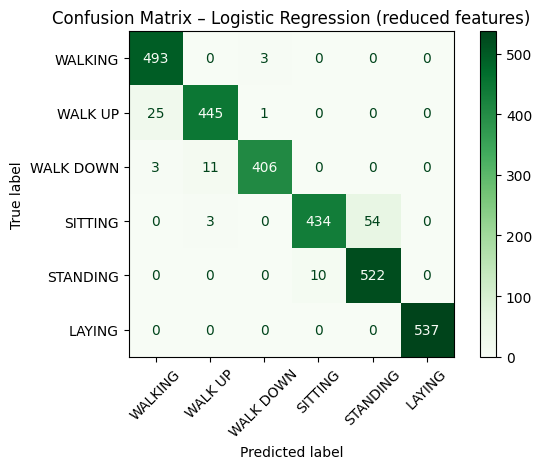

In [ ]:
y_true = y_test["Activity"]
y_pred = preds_reduced2

labels = [1, 2, 3, 4, 5, 6]
class_names = ["WALKING", "WALK UP", "WALK DOWN",
               "SITTING", "STANDING", "LAYING"]

cm = confusion_matrix(y_true, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)

print("Accuracy after removing low-importance features:", accuracy_score(y_test["Activity"], preds_reduced2))
print("Full feature Name: Walking, Walking Upstairs, Walking Downstairs, Sitting, Standing, Laying")

plt.figure(figsize=(6, 6))
disp.plot(cmap="Greens", values_format="d")
plt.title("Confusion Matrix – Logistic Regression (reduced features)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Random Forest Model             
Accuracy: 0.9256871394638616



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train["Activity"])
rf_preds = rf.predict(X_test)

print("Random Forest accuracy:", accuracy_score(y_test["Activity"], rf_preds))
print("\nClassification report (RF):")
print(classification_report(
    y_test["Activity"], rf_preds,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS",
                  "SITTING","STANDING","LAYING"]
))


Random Forest accuracy: 0.9256871394638616

Classification report (RF):
                    precision    recall  f1-score   support

           WALKING       0.90      0.96      0.93       496
  WALKING_UPSTAIRS       0.89      0.91      0.90       471
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
           SITTING       0.92      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



Random Forest New Reduced Model         
Accuracy: 0.9199185612487275







In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train_reduced, y_train["Activity"])
rf_preds = rf.predict(X_test_reduced)

print("Random Forest accuracy:", accuracy_score(y_test["Activity"], rf_preds))
print("\nClassification report (RF):")
print(classification_report(
    y_test["Activity"], rf_preds,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS",
                  "SITTING","STANDING","LAYING"]
))


Random Forest accuracy: 0.9199185612487275

Classification report (RF):
                    precision    recall  f1-score   support

           WALKING       0.89      0.97      0.93       496
  WALKING_UPSTAIRS       0.89      0.90      0.90       471
WALKING_DOWNSTAIRS       0.95      0.85      0.89       420
           SITTING       0.91      0.87      0.89       491
          STANDING       0.88      0.92      0.90       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



Random Forest No outliers                              
Accuracy: 0.9270444519850696


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train_no_outliers, y_train_no_outliers["Activity"])
rf_preds = rf.predict(X_test)

print("Random Forest accuracy:", accuracy_score(y_test["Activity"], rf_preds))
print("\nClassification report (RF):")
print(classification_report(
    y_test["Activity"], rf_preds,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS",
                  "SITTING","STANDING","LAYING"]
))

Random Forest accuracy: 0.9270444519850696

Classification report (RF):
                    precision    recall  f1-score   support

           WALKING       0.90      0.96      0.93       496
  WALKING_UPSTAIRS       0.89      0.91      0.90       471
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
           SITTING       0.92      0.89      0.90       491
          STANDING       0.90      0.93      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



KNN
Accuracy: 0.8802171700033933

---




In [ ]:

knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors=5,
        weights="uniform",
        metric="minkowski",
        p=2
    ))
])

knn_pipe.fit(X_train, y_train["Activity"])


knn_preds = knn_pipe.predict(X_test)

print("KNN accuracy:", accuracy_score(y_test["Activity"], knn_preds))
print("\nClassification Report:")
print(classification_report(
    y_test["Activity"],
    knn_preds,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS",
                  "SITTING","STANDING","LAYING"]
))


KNN accuracy: 0.8802171700033933

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.82      0.97      0.89       496
  WALKING_UPSTAIRS       0.88      0.90      0.89       471
WALKING_DOWNSTAIRS       0.96      0.73      0.83       420
           SITTING       0.88      0.76      0.82       491
          STANDING       0.80      0.93      0.86       532
            LAYING       1.00      0.95      0.97       537

          accuracy                           0.88      2947
         macro avg       0.89      0.87      0.88      2947
      weighted avg       0.89      0.88      0.88      2947



KNN Reduced Subset             

Accuracy: 0.8802171700033933


In [ ]:
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors=5,
        weights="uniform",
        metric="minkowski",
        p=2
    ))
])

knn_pipe.fit(X_train_reduced, y_train["Activity"])

knn_preds = knn_pipe.predict(X_test_reduced)

print("KNN accuracy:", accuracy_score(y_test["Activity"], knn_preds))
print("\nClassification Report:")
print(classification_report(
    y_test["Activity"],
    knn_preds,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS",
                  "SITTING","STANDING","LAYING"]
))

KNN accuracy: 0.8802171700033933

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.82      0.97      0.89       496
  WALKING_UPSTAIRS       0.87      0.90      0.89       471
WALKING_DOWNSTAIRS       0.96      0.73      0.83       420
           SITTING       0.88      0.76      0.82       491
          STANDING       0.80      0.93      0.86       532
            LAYING       1.00      0.95      0.97       537

          accuracy                           0.88      2947
         macro avg       0.89      0.87      0.88      2947
      weighted avg       0.89      0.88      0.88      2947



Neural Network       
*Accuracy*: 0.9494401085850017



In [ ]:
import time
start_time = time.time()


X_train_nn = X_train
X_test_nn  = X_test
y_train_nn = y_train["Activity"]
y_test_nn  = y_test["Activity"]

nn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation="relu",
        solver="adam",
        max_iter=200,
        random_state=42
    ))
])

nn_pipe.fit(X_train_nn, y_train_nn)
nn_preds = nn_pipe.predict(X_test_nn)


end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.3f} seconds")


print("Neural Net accuracy:", accuracy_score(y_test_nn, nn_preds))
print("\nClassification Report:")
print(classification_report(
    y_test_nn, nn_preds,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS",
                  "SITTING","STANDING","LAYING"]
))


Neural Net accuracy: 0.9494401085850017

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.97       496
  WALKING_UPSTAIRS       0.94      0.96      0.95       471
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
           SITTING       0.96      0.89      0.93       491
          STANDING       0.88      0.96      0.92       532
            LAYING       0.99      0.96      0.98       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



1st - one hidden layer 64 neurons

2nd - two hidden layers 200 iter = Neural Net accuracy: 0.9446895147607737

3rd - two hidden layers 300 iterations = Neural Net accuracy: 0.9446895147607737

4th - 3 hidden layers 128, 64, 32 300 iter = Neural Net accuracy: 0.9494401085850017

5th - 3 hidden layers 128 64 32 500 iter = Neural Net accuracy: 0.9426535459789617

6th - 4 hidden layers 128 64 32 32 max iter 300 = Neural Net accuracy: 0.9440108585001696

7th - 4 hidden layers 128 64 32 32 max iter 200 = Neural Net accuracy: 0.9440108585001696



# **Results Summary**

**Original Regressio**n (No changes)                                                 
Accuracy: 0.9602986087546658
                                                                      

**Logistic Regression Correlation Matrix**                    
Accuracy: 0.9402782490668476
                                                  

**Logistic Regression Removing Outliers**             
Accuracy : 0.9606379368849678                                                                 
                                                        
 ✔ ✔ ✔ ✔ ✔ ✔ ***Best Performing Logistic Regression*** ✔ ✔ ✔ ✔ ✔ ✔                                            
Removing Low importance features                                                    
Accuracy: 0.9626739056667798                                                    
Training time: 13.184 seconds
                                                                                

**Random Forest Model**                                                           
Accuracy: 0.9256871394638616

**Random Forest New Reduced Model**                                                   
Accuracy: 0.9199185612487275

**Random Forest No outliers**                                                           
Accuracy: 0.9270444519850696

**KNN**                                                                             
Accuracy: 0.8802171700033933

**KNN Reduced Subset**             
Accuracy: 0.8802171700033933

**Neural Network**       
Accuracy: 0.9494401085850017


